# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Load all the csv files into different DataFrames
colors = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip')
inventories = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip')
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip')
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip')
part_categories = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip')
parts = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip')
sets = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip')
themes = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [6]:
#View the shape of the data
sets.shape

(11673, 5)

In [7]:
# View range of the year
sets['year'].value_counts().sort_index()

-1962       1
-1966       4
-1969       5
-1971       1
-1973       2
-1975       1
-1977       7
-1979       3
-1980       2
-1981       4
-1982       3
-1983       3
-1984       5
-1985       5
-1986       7
-1987      20
-1988       1
-1989       3
-1991       6
-1992       3
-1993       3
-1994       4
-1995       4
-1996       3
-1997      14
-19977      1
-1998      27
-1999      33
-19999      3
-2000      44
         ... 
2004      268
20044      62
2005      251
20055      45
2006      225
20066      36
2007      249
20077      38
2008      269
20088      45
2009      286
20099      63
2010      304
20100      82
2011      330
20111     101
2012      394
20122     123
2013      386
20133     112
2014      379
20144     189
2015      380
20155     175
2016      363
20166     140
2017      232
20177      44
70s        29
80s        85
Name: year, Length: 174, dtype: int64

Three problems appear in this dataframe. 

1. Negative numbers exist.
2. 5-digit years appear
3. Incosistent format '70s' and '80s' 

To clean the data, we made the negative years positive, deleted the repeated 5th digit. As for the data in 70s and 80s, their years are not accurate and make data hard to process in the following step. We observe that the number of sets in 70s and 80s are small and also occupy very small part of this data((29+85/11673)%=0.97%), which means that it has very small influence on the data. In this case, we decided to drop the rows with these figures rather than replacing with the concrete year.( because if we do so, actually these data are also inaccurate as we don't know if it is the exact year of the sets or not, which may cause the inaccurate and incorrect results when we analyse the data or visualize them.)

In [11]:
# Clean the year column

# Strip the '-' from corresponding entry in the 'year' column
sets['year'] = sets['year'].str.lstrip('-')

# Remove the last digit where the digit count is 5
sets.loc[sets['year'].str.len() == 5, 'year'] = sets.loc[sets['year'].str.len() == 5, 'year'].apply(lambda x: x[: 4])

#drop the rows with years of “70" and "80s"
sets=sets[(sets['year']!='70s')& (sets['year']!='80s')]

# Validate the result
sets['year'].value_counts().sort_index()

1950      7
1953      4
1954     14
1955     28
1956     12
1957     21
1958     42
1959      4
1960      3
1961     17
1962     40
1963     18
1964     11
1965     10
1966     89
1967     21
1968     25
1969     69
1971     45
1972     38
1973     67
1974     39
1975     31
1976     68
1977     92
1978     73
1979     82
1980      3
1981     79
1982     76
       ... 
1988     68
1989    115
1990     85
1991    107
1992    115
1993    111
1994    128
1995    128
1996    144
1997    192
1998    325
1999    300
2000    327
2001    339
2002    447
2003    415
2004    371
2005    330
2006    283
2007    321
2008    349
2009    402
2010    444
2011    503
2012    615
2013    593
2014    713
2015    665
2016    596
2017    296
Name: year, Length: 65, dtype: int64

In [12]:
# View the 'inventory parts' 
inventory_parts.head()

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f


In [13]:
# The average 'quantity' in 'inventory parts'
inventory_parts['quantity'].mean()

-inf

In [14]:
# Check the quantity values in the inventory parts
inventory_parts['quantity'].value_counts().sort_index()

-inf            161796
 1.000000       239479
 3.000000        31219
 4.000000        62072
 5.000000        11448
 6.000000        20144
 7.000000         5204
 8.000000        13723
 9.000000         3216
 10.000000        5943
 11.000000        1957
 12.000000        4810
 13.000000        1292
 14.000000        2395
 15.000000         980
 16.000000        2496
 17.000000         669
 18.000000        1309
 19.000000         454
 20.000000        1439
 21.000000         380
 22.000000         622
 23.000000         306
 24.000000         829
 25.000000         341
 26.000000         398
 27.000000         199
 28.000000         459
 29.000000         158
 30.000000         473
                 ...  
 304.000000          2
 317.000000          1
 322.000000          1
 327.000000          1
 344.000000          1
 346.000000          1
 350.000000          5
 360.000000          4
 374.000000          1
 380.000000          1
 388.000000          1
 400.000000          1
 415.000000

Problem: quantity values contain '-Inf' and as there are no data existing for quantity '0' so we suppose that '-Inf' was meant to inidicate the '0' quantity and thus it should be repalced by 0

In [15]:
# Clean the quantity column, change the value '-inf' to '0'
mask_infinity = inventory_parts['quantity'] == -np.inf
inventory_parts.loc[mask_infinity, 'quantity'] = 0

# Check if successfully corrected
inventory_parts['quantity'].value_counts().sort_index()

0.0       161796
1.0       239479
3.0        31219
4.0        62072
5.0        11448
6.0        20144
7.0         5204
8.0        13723
9.0         3216
10.0        5943
11.0        1957
12.0        4810
13.0        1292
14.0        2395
15.0         980
16.0        2496
17.0         669
18.0        1309
19.0         454
20.0        1439
21.0         380
22.0         622
23.0         306
24.0         829
25.0         341
26.0         398
27.0         199
28.0         459
29.0         158
30.0         473
           ...  
304.0          2
317.0          1
322.0          1
327.0          1
344.0          1
346.0          1
350.0          5
360.0          4
374.0          1
380.0          1
388.0          1
400.0          1
415.0          1
450.0          1
451.0          1
457.0          1
460.0          1
495.0          1
509.0          1
516.0          1
540.0          3
556.0          1
630.0          1
720.0          1
724.0          1
771.0          1
810.0          1
900.0         

In [16]:
# Calculate the quantity mean after correction
inventory_parts['quantity'].mean()

2.7670542575540584

This result shows that there is no "-inf" in the data

__\* Briefly explain your approach here \*__

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\\* of the sets vs their publishing year. Do you see a trend over the last years? How do you interpret it?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

#### A3. 1: List the ids of the inventories that belong to sets that contain cars

We find the car according to the sets' names which include 'car' and we use regular expression to match their names.

In [17]:
#Merge "inventory_sets" and "sets"
inventory_merge_sets=inventory_sets.merge(sets,left_on='set_id',right_on='id')
inventory_merge_sets.head()

,inventory_id,set_id,quantity,id,name,year,theme_id,num_parts
0,35,75911-1,1,75911-1,McLaren Mercedes Pit Stop,2015,601,340
1,35,75912-1,1,75912-1,Porsche 911 GT Finish Line,2015,601,561
2,39,75048-1,1,75048-1,The Phantom,2014,182,233
3,39,75053-1,1,75053-1,The Ghost,2014,182,927
4,50,4515-1,1,4515-1,Straight Rails,1991,244,8


In [27]:
# Find all terms related to'car' by using regular expression
# Make all the letter lower to match either the upper letters or the lower ones in "Car", Cars","car" or "cars" 
lower_letter_copy = inventory_merge_sets['name'].str.lower() #! 
is_car = lower_letter_copy.str.contains(r'.*(car|cars)(\s+|$)')
# is_car = lower_letter_copy.str.contains(r'.*(car|cars)(\s[\s\S]*|$)')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [31]:
inventory_merge_sets['quantity'].unique()

array([ 1,  7,  3,  2,  5, 60, 20])

In [29]:
# Get the id list of inventory
car_inventory_ids = inventory_merge_sets.loc[is_car, 'inventory_id'].unique()
list(car_inventory_ids)

[500,
 528,
 14493,
 908,
 1371,
 13427,
 1401,
 1418,
 1732,
 3109,
 3764,
 4430,
 4969,
 5857,
 7151,
 11861,
 13696,
 15694,
 1649,
 6530,
 14011,
 1716,
 2559,
 6296,
 10028,
 12110,
 2814,
 2917,
 4051,
 4187,
 13355,
 13398,
 5358,
 5904,
 9426,
 6066,
 6086,
 6702,
 7363,
 7430,
 7881,
 8140,
 8202,
 8348,
 8820,
 10158,
 13083,
 10406,
 10515,
 14919,
 11966,
 12437,
 12851,
 13380,
 13941,
 14174,
 14711,
 15010,
 16131]

#### A3. 2:  the distribution of part categories(20bins)

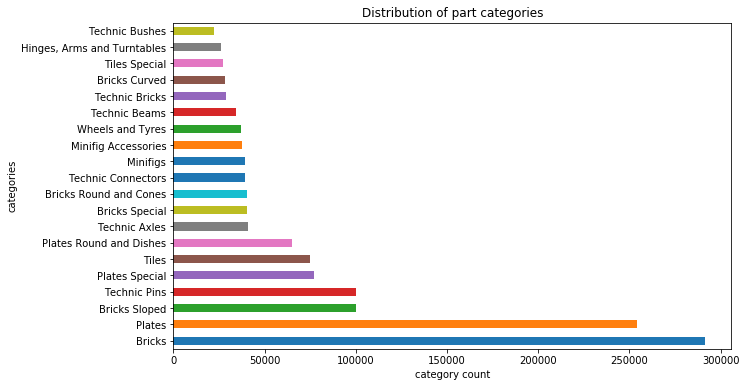

In [32]:
# Change the part_categories id data type to enable merge
part_categories['id'] = part_categories['id'].astype('int')

# Inner join the 4 tables: 'inventory_sets','inventory_parts', 'parts' and 'part_categories' 
# to get the relationship between part_categories and quantities
merged_table = inventory_parts.merge(parts, left_on = 'part_id', right_on = 'id') \
                              .merge(part_categories, left_on = 'part_cat_id', right_on = 'id', suffixes = ['_part', '_cat'])

# Grouby part_category to count parts in each category
rank_of_categories = merged_table.groupby(by = 'name_cat')['quantity'].sum().sort_values(ascending = False)

# Plot the distribution of the largest 20 categories
rank_of_categories[: 20].plot(kind = 'barh', figsize = (10, 6))
plt.xlabel('category count')
plt.ylabel('categories')
plt.title('Distribution of part categories')
plt.show()

#### A3 .3:  the number of sets per dominant color

In [33]:
# Merge the tables: "Inventory_Sets","Inventory_Parts","Sets" and "Color"
sets_color = inventory_sets.merge(inventory_parts, on = 'inventory_id', suffixes = ['_inventory', 'parts']) \
                           .merge(sets, left_on = 'set_id', right_on = 'id') \
                           .merge(colors, left_on = 'color_id', right_on = 'id', suffixes = ['_sets', '_color'])
        
# Group by set_id to view the count of color 
set_grouped_table = sets_color.groupby(by = 'set_id')['name_color']

Find the dominant color of each set

In [34]:
# Create new lists for storage 
dominant_colors = list()
set_ids = list()

# Find the dominant color in each set
# As the color is ordered descending after the groupby function, we choose the first color(index[0]) of each set as the dominant color.
# This also applies to the sets with several colors with same quantities.
for set_id, color_name in set_grouped_table:
    set_ids.append(set_id)
    dominant_colors.append(color_name.value_counts().index[0])

# Store data into a dataframe
set_dominant_color = pd.DataFrame({'set_id': set_ids, 'dominant_color': dominant_colors})
set_dominant_color.head()

,set_id,dominant_color
0,10127-1,[No Color]
1,10173-1,Black
2,10194-1,[No Color]
3,10233-1,[No Color]
4,1064-1,White


In [35]:
# Count the number of set by their dominant color (as the color and set have had the one-to-one matching above)
dominant_color_count = pd.DataFrame(set_dominant_color['dominant_color'].value_counts())
dominant_color_count

,dominant_color
Royal Blue,41
[No Color],40
Unknown,29
Yellow,24
Black,9
Flat Dark Gold,6
White,4
Light Bluish Gray,3
Pearl Gold,3
Green,2


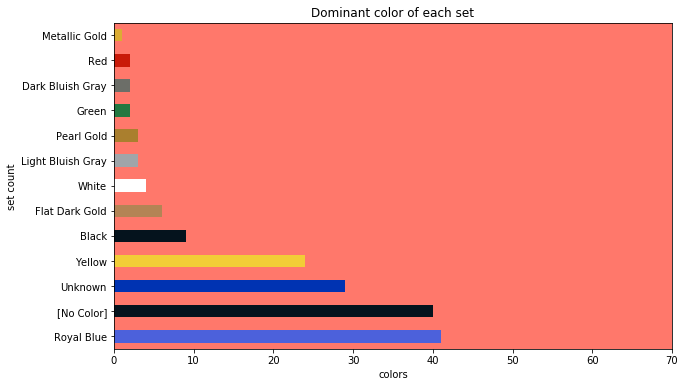

In [36]:
# Color each bar with the respective color that it represents.
colors_for_plot = []
for one_color in dominant_color_count.index:
    colors_for_plot.append(('#' + colors.loc[colors['name'] == one_color, 'rgb']).values)
colors_for_plot = [i[0] for i in colors_for_plot]

# Plot using a (horizontal) bar chart, the number of sets per dominant color. 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

# Change the color of figure background in order to see the white color
ax.set_facecolor((1.0, 0.47, 0.42))
dominant_color_count['dominant_color'].plot.barh(color = colors_for_plot, xlim = (0, 70), figsize = [10, 6])

plt.xlabel('colors')
plt.ylabel('set count')
plt.title('Dominant color of each set')
plt.show()

#### A3. 4: a scatter plot of the luminance of the sets vs their publishing year

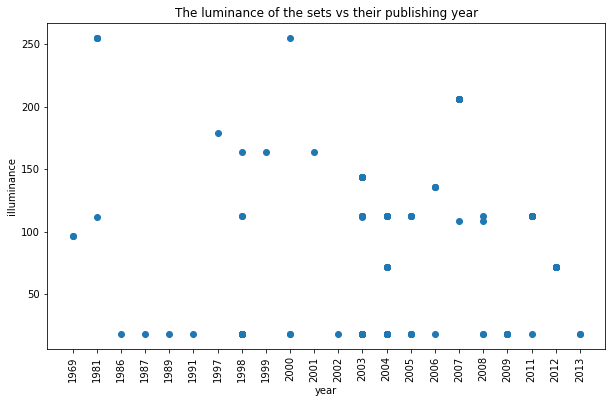

In [37]:
# Link sets with their corresponding RGB( Merge with "Colors" table)
sets_rgb = sets.merge(set_dominant_color, left_on = 'id', right_on = 'set_id') \
               .merge(colors, left_on = 'dominant_color', right_on = 'name', suffixes = ['_sets', '_colors'])

# Calculate luminance from hex format rgb
def calculate_illuminance(hex_rgb):
    r = int(hex_rgb[0: 2], 16)
    g = int(hex_rgb[2: 4], 16)
    b = int(hex_rgb[4: 6], 16) 
    return np.sqrt(0.299 * r ** 2 + 0.587 * g ** 2 + 0.114 * b ** 2)

# Calculate the illuminance for each set
sets_rgb['illuminance'] = sets_rgb['rgb'].apply(calculate_illuminance)

# Plot a scatter figure of the luminance of the sets vs their publishing year
fig, ax = plt.subplots(figsize = (10, 6))
sets_rgb = sets_rgb.sort_values(by = 'year')
plt.scatter(x = sets_rgb['year'], y = sets_rgb['illuminance'])
plt.title('The luminance of the sets vs their publishing year')     
plt.xticks(rotation = 90)
plt.xlabel('year')
plt.ylabel('illuminance')
plt.show()

In [38]:
# View the average of the illuminance of the last several years
sets_rgb.loc[sets_rgb.year.isin(['2011','2012','2013']),][['illuminance','year']].groupby('year').mean()

,illuminance
year,
2011,108.971921
2012,71.685166
2013,17.755450


The figure shows a overally decreasing tendency of the dominant color illuminance. Especially during the last several years (2011 - 2013) the reduction is obvious. This may be due to the fact that colors with low illuminance have become more and more popular or certain Lego sets with low illuminance colors are on trend for the past years.

In [39]:
# Merge the Set_RGB with the table "themes"
sets_themes=sets_rgb.merge(themes,how='left',left_on='theme_id',right_on='id')
sets_themes.loc[sets_themes.year.isin(['2011','2012','2013']),][['illuminance','year','name','name_sets']]

,illuminance,year,name,name_sets
115,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 24) - Sant...
116,17.755450,2011,Power Functions,Power Functions Train Motor
117,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 23) - Chri...
118,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 3) - Mech...
119,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 10) - Impe...
120,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 11) - Batt...
121,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 12) - Rebe...
122,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 13) - R2-Q5
123,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 14) - Mous...
124,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 15) - Repu...


As we look more in detailed, the theme of most of the sets with high level of illuminance in these years is Star Wars. We can rationally conjectured that the " Star Wars " was very popular during that period. 

In [40]:
# View the of illuminance of sets related to "Star Wars"
sets_themes.loc[sets_themes.name.str.contains(r'.*Star Wars[\s\S]*')][['illuminance','year','name','name_sets']]

,illuminance,year,name,name_sets
24,17.755450,2000,Star Wars Episode 4/5/6,Millennium Falcon
25,17.755450,2000,Star Wars Episode 1,Flash Speeder
28,17.755450,2002,Star Wars Episode 4/5/6,Final Duel I
73,17.755450,2005,Star Wars Episode 3,Droid Tri-Fighter
74,17.755450,2005,Star Wars Episode 3,ARC-170 Starfighter
98,108.734815,2007,Star Wars Episode 3,Droids Battle Pack
109,108.734815,2008,Star Wars Episode 2,Hailfire Droid & Spider Droid
115,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 24) - Sant...
117,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 23) - Chri...
118,112.772607,2011,Star Wars,Advent Calendar 2011 Star Wars (Day 3) - Mech...


According to the data in the past years, the sets about "Star Wars" in 2012 seem to be very different with the figure 71.685166. And basically, the illuminance of "Star Wars" sets has either very high illuminance (over 100) or the very low illuminance (about 17.75)

In [41]:
#View the actual data about the sets and the colors relationship
sets_color.loc[sets_color.year.isin(['2011','2012','2013']),][['name_sets','year','name_color']]

,name_sets,year,name_color
0,Horizon Express,2013,[No Color]
1,Power Functions Train Motor,2011,[No Color]
68,DK Star Wars Brickmaster: Battle For The Stole...,2013,[No Color]
153,Advent Calendar 2011 Star Wars (Day 9) - X-wi...,2011,Royal Blue
154,Advent Calendar 2011 Star Wars (Day 10) - Impe...,2011,Royal Blue
155,Advent Calendar 2011 Star Wars (Day 11) - Batt...,2011,Royal Blue
156,Advent Calendar 2011 Star Wars (Day 12) - Rebe...,2011,Royal Blue
157,Advent Calendar 2011 Star Wars (Day 13) - R2-Q5,2011,Royal Blue
158,Advent Calendar 2011 Star Wars (Day 14) - Mous...,2011,Royal Blue
159,Advent Calendar 2011 Star Wars (Day 15) - Repu...,2011,Royal Blue


As we see the color of sets during that period in the data, it records "Unknown" and "No Color", which indicates a type of blue and black respectively actually. The descend illuminance maybe result from the disappointing recording of data rather than the real color of the sets.

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [44]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'
bikes = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json')

In [45]:
bikes

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.236490,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.237030,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.233090,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.259050,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.253840,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.252440,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.238940,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944063,One Way


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [46]:
# Check the data type of each column
bikes.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

In [47]:
# The value range of each attribute
bikes.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [48]:
# Transform relevant columns to category data type
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')
bikes['Passholder Type']      = bikes['Passholder Type'].astype('category')
bikes.dtypes

Bike ID                        float64
Duration                         int64
End Time                        object
Ending Station ID              float64
Ending Station Latitude        float64
Ending Station Longitude       float64
Passholder Type               category
Plan Duration                  float64
Start Time                      object
Starting Station ID            float64
Starting Station Latitude      float64
Starting Station Longitude     float64
Trip ID                          int64
Trip Route Category           category
dtype: object

In [49]:
bikes

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.236490,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.237030,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.233090,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.259050,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.253840,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.252440,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.238940,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944063,One Way


Drop the redundent colums 'End Time', 'Plan Duration', 'Starting Station Latiitude', 'Starting Station Longitude','Ending Station Latiitude', 'Ending Station Longitude'
1. 'End Time' can be calculated from 'Start Time' and 'Duration'; 
2. 'Plan Duration' is related to 'Passholder Type'; 
3. Longitude and lattitude of each station correpsond to the 'station ID'.

The pitfalls of these columns are increasing the time to process the data and make the data more complicated. More importantly, as the redundancy exists in the data, it's hard to maintain the data properly (update, insert and delete) and also makes the data hard to readable.

There is an example about the information of station (Station ID, Station Latitude, Station Longitude).

In [50]:
# find the null data in the station's columns
bikes[['Starting Station ID','Starting Station Latitude','Starting Station Longitude','Ending Station ID','Ending Station Latitude','Ending Station Longitude']].isna().sum()

Starting Station ID             19
Starting Station Latitude       48
Starting Station Longitude      48
Ending Station ID               96
Ending Station Latitude       1051
Ending Station Longitude      1051
dtype: int64

As we can see above ,there are some null data in the information about station. Let's look closer to these data

In [51]:
# View the null data of one of the station's columns
null_columns=bikes.columns[bikes.isnull().any()]
bikes[bikes['Ending Station Latitude'].isnull()][null_columns]

,Bike ID,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude
55444,5838.0,3000.0,NaN,NaN,30.0,3082.0,34.046520,-118.237411
55463,6197.0,3000.0,NaN,NaN,0.0,3037.0,34.034801,-118.231277
55517,5830.0,3000.0,NaN,NaN,30.0,3040.0,34.053570,-118.266357
55547,5808.0,3000.0,NaN,NaN,30.0,3049.0,34.056969,-118.253593
55639,5931.0,3000.0,NaN,NaN,30.0,3052.0,34.051102,-118.264557
55651,6296.0,3000.0,NaN,NaN,0.0,3016.0,34.052898,-118.241562
55660,6649.0,3000.0,NaN,NaN,0.0,3034.0,34.042061,-118.263382
55696,6101.0,3000.0,NaN,NaN,0.0,3006.0,34.045540,-118.256668
56056,5949.0,3000.0,NaN,NaN,0.0,3082.0,34.046520,-118.237411
56075,6527.0,3000.0,NaN,NaN,0.0,3008.0,34.046612,-118.262733


Some stations have "Station ID"' but lose their "Station Latitude" and "Station Longitude" (like the station with the Station ID 3000.0). This may result from many reasons: the bad work of the recorders or the undetermined information and etc. If someone want to update this station information, he should update a lot of rows relating this loss of data, which is very huge workload. In addition to the update, if someone wants to insert some new records, containing same station information, he will insert the same data again and again. And if something disturb his work in this process, it is likely to cause some mistake of data, and then makes the whole data much more inaccurate. This also applies to the machine.

In [52]:
# Bikes with ID 3000.0
bikes[bikes['Starting Station ID']==3000.0].head()

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
103005,5987.0,660,2017-01-15T13:51:00,3058.0,34.035801,-118.233170,Monthly Pass,30.0,2017-01-15T13:40:00,3000.0,NaN,NaN,17950743,One Way
114734,6622.0,1560,2017-02-18T16:20:00,3069.0,34.050880,-118.248253,Monthly Pass,NaN,2017-02-18T15:54:00,3000.0,NaN,NaN,20310927,One Way
117493,6298.0,2100,2017-02-26T12:06:00,3067.0,34.045181,-118.250237,Flex Pass,365.0,2017-02-26T11:31:00,3000.0,NaN,NaN,20813352,One Way
117549,6548.0,1320,2017-02-26T14:02:00,3076.0,34.040600,-118.253838,Monthly Pass,30.0,2017-02-26T13:40:00,3000.0,NaN,NaN,20819605,One Way
117605,6179.0,1740,2017-02-26T16:09:00,3049.0,34.056969,-118.253593,Monthly Pass,30.0,2017-02-26T15:40:00,3000.0,NaN,NaN,20825981,One Way


##### Extraction from the initial dataframe

In [53]:
#Extract the station information(starting station and ending station) from the initial dataframe
ES=bikes[['Ending Station ID','Ending Station Latitude','Ending Station Longitude']]
SS=bikes[['Starting Station ID','Starting Station Latitude','Starting Station Longitude']]

#rename the station columns' name in order to make concatenation
ES=ES.rename(columns={'Ending Station ID':'Station ID','Ending Station Latitude':'Latitude','Ending Station Longitude':'Longitude'})
SS=SS.rename(columns={'Starting Station ID':'Station ID','Starting Station Latitude':'Latitude','Starting Station Longitude':'Longitude'})

#concatenate two dataframe, then drop the duplicates and set the "Station ID" as index
Station=pd.concat([ES, SS], axis=0)
Station=Station.drop_duplicates(subset='Station ID')
Station=Station.set_index('Station ID')

#drop the rows with all null columns 
Station=Station.dropna(how='all')

Station.head()

,Latitude,Longitude
Station ID,,
3014.0,34.056610,-118.23721
3016.0,34.052898,-118.24156
3032.0,34.049889,-118.25588
3054.0,34.039219,-118.23649
3005.0,34.048550,-118.25905


In [54]:
#Extract the Passholder Type-Plan Duration relationship from the dataframe, the steps are the same as above
pass_duration=bikes[['Passholder Type','Plan Duration']].drop_duplicates(subset='Passholder Type').set_index('Passholder Type')

pass_duration

,Plan Duration
Passholder Type,
Monthly Pass,30.0
Flex Pass,365.0
Walk-up,0.0
Staff Annual,NaN


Obviously, the initial one is more susceptible to inconsistencies because of not only the hard maintanance of the data but also the lack of the constrains of data and the contrains between the relationship of data. Due to the latter reason, the data can be modified easily. For example, it may result to the different "Station Latitude" corresponding to one "Station ID".

In [55]:
# Drop the redundent features
bikes_reduced = bikes.drop(['End Time', 'Plan Duration', 'Starting Station Latitude', 
                            'Starting Station Longitude', 'Ending Station Longitude','Ending Station Latitude'], axis = 1)

print('*******Innitial data******')
print(bikes.dtypes)
print('shape: ', bikes.shape)
print('*******Reduced data*******')
print(bikes_reduced.dtypes)
print('shape: ',bikes_reduced.shape)

*******Innitial data******
Bike ID                        float64
Duration                         int64
End Time                        object
Ending Station ID              float64
Ending Station Latitude        float64
Ending Station Longitude       float64
Passholder Type               category
Plan Duration                  float64
Start Time                      object
Starting Station ID            float64
Starting Station Latitude      float64
Starting Station Longitude     float64
Trip ID                          int64
Trip Route Category           category
dtype: object
shape:  (132427, 14)
*******Reduced data*******
Bike ID                 float64
Duration                  int64
Ending Station ID       float64
Passholder Type        category
Start Time               object
Starting Station ID     float64
Trip ID                   int64
Trip Route Category    category
dtype: object
shape:  (132427, 8)


__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

#### B3. 1: the distribution of the number of outgoing trips from each station

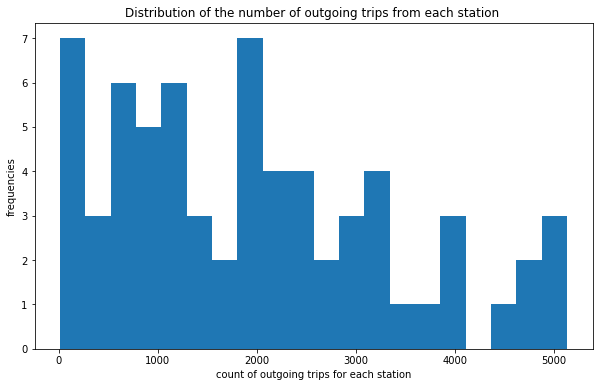

In [56]:
# Plot the distribution of the number of outgoing trips from each station
bikes_reduced['Starting Station ID'].value_counts().plot.hist(bins = 20, figsize = (10, 6))
plt.xlabel('count of outgoing trips for each station')
plt.ylabel('frequencies')
plt.title('Distribution of the number of outgoing trips from each station ')
plt.show()


#### B3. 2: the duration and trip starting hour in the day attributes

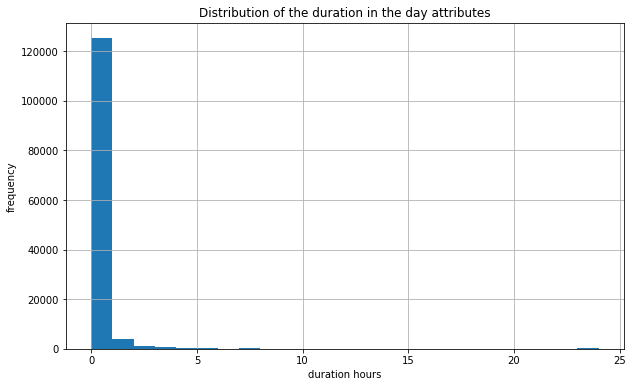

In [57]:
# Transform the duration in hour format
duration_hours = bikes_reduced['Duration'] / 3600

# Visualization
duration_hours.hist(bins = range(0, 25), figsize = (10, 6))
plt.xlabel('duration hours')
plt.ylabel('frequency')
plt.title('Distribution of the duration in the day attributes')
plt.show()

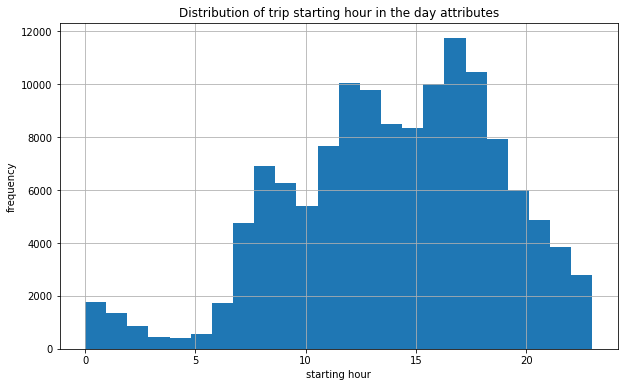

In [58]:
# Extract the starting hour for each trip
start_hour = bikes_reduced['Start Time'].apply(lambda x: x[-8: -6]).astype('int')

# Visualization
start_hour.hist(bins = 24, figsize = (10, 6));
plt.xlabel('starting hour')
plt.ylabel('frequency')
plt.title('Distribution of trip starting hour in the day attributes')
plt.show()

#### B3. 3:  the proportion of trips by passholder type 

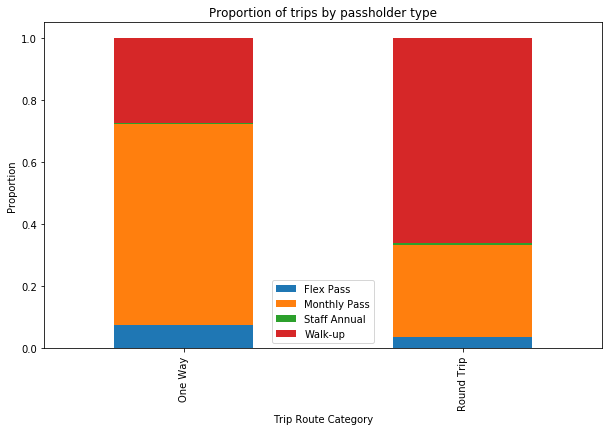

In [59]:
# For the proportion of each'Passholder Type' in 'Trip Route Category'
pass_proportion = {}
# Seperate two group according to the "Trip Route Category" and get the respective proportion of each "Passholder Type"
for each_category, group in bikes_reduced.groupby(by = 'Trip Route Category'):
    total_count = group.shape[0]
    pass_proportion[each_category] = group['Passholder Type'].value_counts() / total_count
    
# Visualization
pass_proportion = pd.DataFrame(pass_proportion)
pass_proportion.transpose().plot(kind = 'bar', stacked = True, figsize = (10, 6))

plt.xlabel('Trip Route Category')
plt.ylabel('Proportion')
plt.title('Proportion of trips by passholder type')
plt.show()

#### B3. 4:  the proportion of trips by passholder type and trip route category.

In [82]:
# Find morning trips
morning_trips = bikes_reduced[(start_hour < 12) & (start_hour >= 0)]

# Group by 'Trip Route Category' and 'Passholder type'
morning_classification = morning_trips.groupby(by = ['Trip Route Category', 'Passholder Type'])
morning_proportion = {}

# Caculate the proportion for each type
for each, group in morning_classification:
    morning_proportion[each] = group.shape[0]
morning_proportion = pd.DataFrame(morning_proportion, index = ['proportion']) / len(morning_trips)
morning_proportion = morning_proportion.transpose()
morning_proportion

proportion
One Way    Flex Pass       0.069487
           Monthly Pass    0.643531
           Staff Annual    0.002541
           Walk-up         0.196700
Round Trip Flex Pass       0.003300
           Monthly Pass    0.027658
           Staff Annual    0.001021
           Walk-up         0.055762

In [83]:
morning_proportion.rename_axis(['Trip Route Category', 'Passholder Type'], inplace = True)
morning_proportion.reset_index(level=['Trip Route Category', 'Passholder Type'],inplace=True)
morning_proportion

,Trip Route Category,Passholder Type,proportion
0,One Way,Flex Pass,0.069487
1,One Way,Monthly Pass,0.643531
2,One Way,Staff Annual,0.002541
3,One Way,Walk-up,0.196700
4,Round Trip,Flex Pass,0.003300
5,Round Trip,Monthly Pass,0.027658
6,Round Trip,Staff Annual,0.001021
7,Round Trip,Walk-up,0.055762


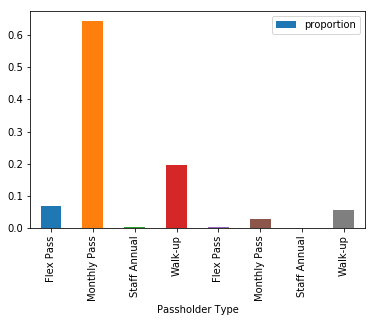

In [89]:
morning_proportion.plot('Passholder Type', 'proportion', 'bar', sharex=True)

<BarContainer object of 8 artists>

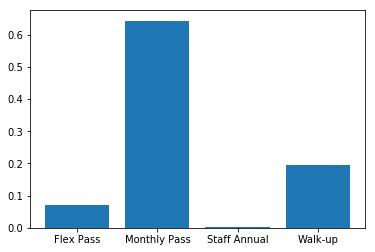

In [85]:
plt.bar(morning_proportion['Passholder Type'], morning_proportion['proportion'], )

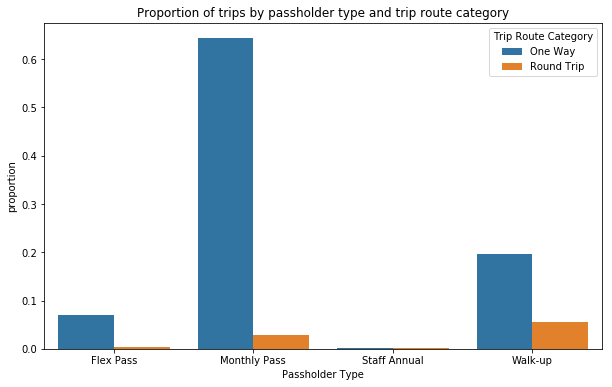

In [91]:
# Visualization
plt.figure(figsize = (10, 6))
plt.title('Proportion of trips by passholder type and trip route category')
sns.barplot(x = "Passholder Type",y="proportion",hue="Trip Route Category",data=morning_proportion);

In general, more people prefer to one way trip rather than round trip in the morning. Especially for people with monthly pass, it shows that one way trip preference is over-6-times more than the round trip. Further more, over 60% people hold the monthly pass in this case, occupying the largest number of people traveling by metro bike in the morning. In addition, for those people who hold the staff annual, the chart represents the smallest percentage in the chart with the same figure of those choosing one way trip and round trip.

#### B3. 5: the proportion of trips by passholder type and trip route category for each of the two intervals with same numbers

In [92]:
# Find the hour make the day into two intervals that have (approximately) 
# the same number of bikes leaving the stations
leaving_count_hourly = start_hour.value_counts().sort_index()
accumulate_count = 0
half_count_hour = 0
for hour, count in pd.DataFrame(leaving_count_hourly).iterrows():
    accumulate_count += count[0]
    if accumulate_count > .5 * len(start_hour):
        half_count_hour = hour
        print('The hour is',half_count_hour)
        print(accumulate_count / len(start_hour))
        break

The hour is 14
0.5019897754989542


In [93]:
# Split the data into two halves
first_half = bikes_reduced[start_hour <= 14]
second_half = bikes_reduced[start_hour > 14]

# Initialize the storage dictionaries 
first_half_proportion = {}
second_half_proportion = {}

# Create lists to enable for loop 
halves = [first_half, second_half]
half_proportions = [first_half_proportion, second_half_proportion]

# Use for loop to conduct the same operation
for half, half_proportion in zip(halves, half_proportions):
    half_classification = half.groupby(by = ['Trip Route Category', 'Passholder Type'])
    
    for each, group in half_classification:
        half_proportion[each] = group.shape[0]
    
# Normalize the data 
first_half_proportion = pd.DataFrame(first_half_proportion, index = ['proportion']) / len(first_half)
second_half_proportion = pd.DataFrame(second_half_proportion, index = ['proportion']) / len(second_half)

# Merge them into one dataframe
two_halves_proportions = pd.concat([first_half_proportion, second_half_proportion]).transpose()
two_halves_proportions.columns = ['first_half_day', 'second_half_day']

# Set the unique indices 
indices = list(two_halves_proportions.index)
for i, index in enumerate(indices):
    indices[i] = indices[i][0] + ' ' +indices[i][1]

two_halves_proportions.index = indices    
two_halves_proportions

,first_half_day,second_half_day
One Way Flex Pass,0.069483,0.066945
One Way Monthly Pass,0.592115,0.578772
One Way Staff Annual,0.002753,0.001759
One Way Walk-up,0.236668,0.258438
Round Trip Flex Pass,0.004031,0.003260
Round Trip Monthly Pass,0.031093,0.025853
Round Trip Staff Annual,0.000888,0.000364
Round Trip Walk-up,0.062969,0.064610


The proportion of trips are not depend on whether it is the first or second hour interval since their values are almostly the same.

It is less likely for company to make significant profits if it creats a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one. The proportion of first half day is a little bit larger than that of the second half. If this relationship keeps for a long time, this company is more likely to lose their money. As there are more people in the first interval but they provide less price for them.